In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': [13, 13]}, font_scale=1.2)

In [2]:
df = pd.read_csv('bikes.csv')
df

datetime  season  holiday  workingday weather   temp  \
0      2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1      2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2      2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3      2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4      2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                    ...     ...      ...         ...     ...    ...   
10881  2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882  2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883  2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884  2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885  2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  
0          81.0        NaN       3          13                  16  
1          80.0     0.0000       8          32                  40  
2           NaN     0.0000       5          27                  32  
3          75.0     0.0000       3          10                  13  
4          75.0        NaN       0           1                   1  
...         ...        ...     ...         ...                 ...  
10881      50.0    26.0027       7         329                 336  
10882       NaN        NaN      10         231                 241  
10883      61.0    15.0013       4         164                 168  
10884       NaN     6.0032      12         117                 129  
10885      66.0     8.9981       4          84                  88  

[10886 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [4]:
df.describe()

holiday   workingday         temp     humidity    windspeed  \
count  10030.000000  9388.000000  8104.000000  7462.000000  6820.000000   
mean       0.029113     0.678206    20.317665    61.790673    12.708806   
std        0.168131     0.467189     7.818568    19.262084     8.131154   
min        0.000000     0.000000     0.820000     0.000000     0.000000   
25%        0.000000     0.000000    13.940000    47.000000     7.001500   
50%        0.000000     1.000000    20.500000    62.000000    12.998000   
75%        0.000000     1.000000    26.240000    77.000000    16.997900   
max        1.000000     1.000000    41.000000   100.000000    56.996900   

             casual    registered  rented_bikes_count  
count  10886.000000  10886.000000        10886.000000  
mean      36.021955    155.552177          191.574132  
std       49.960477    151.039033          181.144454  
min        0.000000      0.000000            1.000000  
25%        4.000000     36.000000           42.000000  
50%       17.000000    118.000000          145.000000  
75%       49.000000    222.000000          284.000000  
max      367.000000    886.000000          977.000000

### Data Analayis

**Question**

1. Make Profit Feature.
    - Each registerd user rent bike for 5 USD/hour.
    - Casual user rent bike for 20 USD/hour.
    - Taxes 0.14%.
    - Maintance 1500/year.
2. Profit for each day.
3. Which season that has more registeration & profit.
4. Which weather condition that has more registeration & profit.
5. Correlation between profit & bikes count with all features.
6. Rentals during rush hours (5-7 am & 12-3 pm).

In [5]:
df.head()

datetime  season  holiday  workingday weather  temp  humidity  \
0  2011-01-01 00:00:00  Spring      0.0         0.0   Clear  9.84      81.0   
1  2011-01-01 01:00:00  Spring      0.0         0.0     NaN  9.02      80.0   
2  2011-01-01 02:00:00  Spring      0.0         0.0   Clear  9.02       NaN   
3  2011-01-01 03:00:00  Spring      0.0         0.0   Clear  9.84      75.0   
4  2011-01-01 04:00:00     NaN      0.0         0.0   Clear   NaN      75.0   

   windspeed  casual  registered  rented_bikes_count  
0        NaN       3          13                  16  
1        0.0       8          32                  40  
2        0.0       5          27                  32  
3        0.0       3          10                  13  
4        NaN       0           1                   1

In [6]:
1500 / (365 * 24)

0.17123287671232876

In [7]:
def calculate_profit(customer):
    cas_per_hour = 20
    reg_per_hour = 5
    taxes = 0.14
    maintaince_per_hour = 1500 / (365 * 24)
    casual = customer['casual']
    registered = customer['registered']
    cash = casual * cas_per_hour + registered * reg_per_hour
    cash_with_taxes = cash - (cash * 0.14)
    safy = cash_with_taxes - maintaince_per_hour
    return safy

In [8]:
df['profit'] = df[['casual', 'registered']].apply(calculate_profit, axis=1)

In [9]:
df

datetime  season  holiday  workingday weather   temp  \
0      2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1      2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2      2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3      2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4      2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                    ...     ...      ...         ...     ...    ...   
10881  2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882  2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883  2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884  2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885  2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit  
0       107.328767  
1       275.028767  
2       201.928767  
3        94.428767  
4         4.128767  
...            ...  
10881  1534.928767  
10882  1165.128767  
10883   773.828767  
10884   709.328767  
10885   429.828767  

[10886 rows x 12 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


In [11]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df

datetime  season  holiday  workingday weather   temp  \
0     2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1     2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2     2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3     2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4     2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                   ...     ...      ...         ...     ...    ...   
10881 2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882 2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883 2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884 2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885 2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit  
0       107.328767  
1       275.028767  
2       201.928767  
3        94.428767  
4         4.128767  
...            ...  
10881  1534.928767  
10882  1165.128767  
10883   773.828767  
10884   709.328767  
10885   429.828767  

[10886 rows x 12 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 1020.7+ KB


In [13]:
df['week_day_name'] = df['datetime'].dt.day_name()
df

datetime  season  holiday  workingday weather   temp  \
0     2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1     2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2     2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3     2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4     2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                   ...     ...      ...         ...     ...    ...   
10881 2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882 2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883 2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884 2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885 2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit week_day_name  
0       107.328767      Saturday  
1       275.028767      Saturday  
2       201.928767      Saturday  
3        94.428767      Saturday  
4         4.128767      Saturday  
...            ...           ...  
10881  1534.928767     Wednesday  
10882  1165.128767     Wednesday  
10883   773.828767     Wednesday  
10884   709.328767     Wednesday  
10885   429.828767     Wednesday  

[10886 rows x 13 columns]

In [14]:
df.groupby('week_day_name').describe()['profit']

count         mean          std       min         25%  \
week_day_name                                                           
Friday         1529.0  1250.484751  1110.019552  4.128767  300.828767   
Monday         1551.0  1203.496079  1129.727600  4.128767  249.228767   
Saturday       1584.0  1666.252504  1772.625088  4.128767  283.628767   
Sunday         1579.0  1513.401535  1571.404307  4.128767  287.928767   
Thursday       1553.0  1157.893803  1086.029849  4.128767  236.328767   
Tuesday        1539.0  1112.073082  1065.481400  4.128767  210.528767   
Wednesday      1551.0  1100.526188  1111.243780  4.128767  210.528767   

                       50%          75%          max  
week_day_name                                         
Friday         1036.128767  1891.828767  5908.028767  
Monday          954.428767  1827.328767  5594.128767  
Saturday        956.578767  2614.228767  7881.728767  
Sunday          812.528767  2429.328767  7034.628767  
Thursday        911.428767  1741.328767  5533.928767  
Tuesday         834.028767  1704.778767  6338.028767  
Wednesday       791.028767  1657.478767  5447.928767

In [15]:
df.groupby('season').describe()[['rented_bikes_count', 'profit']].transpose()

season                           Fall       Spring       Summer       Winter
rented_bikes_count count  2680.000000  2634.000000  2670.000000  2688.000000
                   mean    234.471642   116.089218   214.711610   198.672247
                   std     197.122029   125.353298   192.109412   177.491672
                   min       1.000000     1.000000     1.000000     1.000000
                   25%      68.000000    23.000000    47.000000    51.000000
                   50%     195.000000    78.000000   171.500000   161.000000
                   75%     348.000000   163.000000   321.750000   294.000000
                   max     977.000000   801.000000   873.000000   948.000000
profit             count  2680.000000  2634.000000  2670.000000  2688.000000
                   mean   1682.572797   697.150331  1533.249029  1222.474898
                   std    1429.092535   850.960767  1454.120645  1184.508417
                   min       4.128767     4.128767     4.128767     4.128767
                   25%     445.953767   128.828767   318.028767   292.228767
                   50%    1412.378767   436.278767  1212.428767   935.078767
                   75%    2472.328767   914.653767  2244.428767  1751.003767
                   max    7881.728767  7679.628767  7795.728767  7864.528767

In [16]:
df.groupby('weather').describe()[['rented_bikes_count', 'profit']].transpose()

weather                         Clear         Mist        Rainy       Snowy
rented_bikes_count count  5793.000000  2259.000000   693.000000    1.000000
                   mean    204.109442   179.722001   118.741703  164.000000
                   std     187.713187   168.655730   138.911722         NaN
                   min       1.000000     1.000000     1.000000  164.000000
                   25%      47.000000    40.000000    24.000000  164.000000
                   50%     160.000000   137.000000    73.000000  164.000000
                   75%     302.000000   266.000000   158.000000  164.000000
                   max     977.000000   890.000000   891.000000  164.000000
profit             count  5793.000000  2259.000000   693.000000    1.000000
                   mean   1391.800302  1171.014380   735.358349  782.428767
                   std    1372.771954  1164.297225   925.280928         NaN
                   min       4.128767     4.128767     4.128767  782.428767
                   25%     283.628767   244.928767   128.828767  782.428767
                   50%    1006.028767   834.028767   399.728767  782.428767
                   75%    2055.228767  1758.528767   932.928767  782.428767
                   max    7795.728767  7881.728767  5542.528767  782.428767

In [17]:
df

datetime  season  holiday  workingday weather   temp  \
0     2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1     2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2     2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3     2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4     2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                   ...     ...      ...         ...     ...    ...   
10881 2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882 2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883 2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884 2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885 2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit week_day_name  
0       107.328767      Saturday  
1       275.028767      Saturday  
2       201.928767      Saturday  
3        94.428767      Saturday  
4         4.128767      Saturday  
...            ...           ...  
10881  1534.928767     Wednesday  
10882  1165.128767     Wednesday  
10883   773.828767     Wednesday  
10884   709.328767     Wednesday  
10885   429.828767     Wednesday  

[10886 rows x 13 columns]

In [18]:
df['hour'] = df['datetime'].dt.hour
df

datetime  season  holiday  workingday weather   temp  \
0     2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1     2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2     2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3     2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4     2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                   ...     ...      ...         ...     ...    ...   
10881 2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882 2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883 2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884 2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885 2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit week_day_name  hour  
0       107.328767      Saturday     0  
1       275.028767      Saturday     1  
2       201.928767      Saturday     2  
3        94.428767      Saturday     3  
4         4.128767      Saturday     4  
...            ...           ...   ...  
10881  1534.928767     Wednesday    19  
10882  1165.128767     Wednesday    20  
10883   773.828767     Wednesday    21  
10884   709.328767     Wednesday    22  
10885   429.828767     Wednesday    23  

[10886 rows x 14 columns]

In [19]:
def is_rush_hour(hour):
    return 1 if hour in [5, 6, 7, 12, 13, 14, 15] else 0

df['is_rush_hour'] = df['hour'].apply(is_rush_hour)
df

datetime  season  holiday  workingday weather   temp  \
0     2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1     2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2     2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3     2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4     2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                   ...     ...      ...         ...     ...    ...   
10881 2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882 2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883 2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884 2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885 2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit week_day_name  hour  is_rush_hour  
0       107.328767      Saturday     0             0  
1       275.028767      Saturday     1             0  
2       201.928767      Saturday     2             0  
3        94.428767      Saturday     3             0  
4         4.128767      Saturday     4             0  
...            ...           ...   ...           ...  
10881  1534.928767     Wednesday    19             0  
10882  1165.128767     Wednesday    20             0  
10883   773.828767     Wednesday    21             0  
10884   709.328767     Wednesday    22             0  
10885   429.828767     Wednesday    23             0  

[10886 rows x 15 columns]

In [20]:
df.groupby('is_rush_hour').describe()['profit']

count         mean          std       min         25%  \
is_rush_hour                                                           
0             7700.0  1246.828209  1257.083498  4.128767  236.328767   
1             3186.0  1388.464235  1424.069730  4.128767  300.828767   

                      50%          75%          max  
is_rush_hour                                         
0              859.828767  1874.628767  7881.728767  
1             1001.728767  1939.128767  7864.528767

In [21]:
df.groupby('is_rush_hour').describe()['casual']

count       mean        std  min  25%   50%   75%    max
is_rush_hour                                                           
0             7700.0  32.450779  42.829139  0.0  4.0  16.0  44.0  367.0
1             3186.0  44.652856  63.174563  0.0  4.0  17.0  59.0  362.0

In [22]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'week_day_name', 'hour', 'is_rush_hour'],
      dtype='object')

In [23]:
df.corr().loc[['temp','humidity', 'windspeed', 'casual', 'registered']][['profit', 'rented_bikes_count']]

profit  rented_bikes_count
temp        0.462618            0.391867
humidity   -0.358150           -0.317282
windspeed   0.100205            0.097747
casual      0.902713            0.690414
registered  0.822156            0.970948

In [24]:
df

datetime  season  holiday  workingday weather   temp  \
0     2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1     2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2     2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3     2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4     2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                   ...     ...      ...         ...     ...    ...   
10881 2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882 2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883 2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884 2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885 2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit week_day_name  hour  is_rush_hour  
0       107.328767      Saturday     0             0  
1       275.028767      Saturday     1             0  
2       201.928767      Saturday     2             0  
3        94.428767      Saturday     3             0  
4         4.128767      Saturday     4             0  
...            ...           ...   ...           ...  
10881  1534.928767     Wednesday    19             0  
10882  1165.128767     Wednesday    20             0  
10883   773.828767     Wednesday    21             0  
10884   709.328767     Wednesday    22             0  
10885   429.828767     Wednesday    23             0  

[10886 rows x 15 columns]

In [25]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'week_day_name', 'hour', 'is_rush_hour'],
      dtype='object')

In [26]:
# df.drop('datetime', axis=1, inplace=True)

In [27]:
df

datetime  season  holiday  workingday weather   temp  \
0     2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1     2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2     2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3     2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4     2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                   ...     ...      ...         ...     ...    ...   
10881 2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882 2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883 2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884 2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885 2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit week_day_name  hour  is_rush_hour  
0       107.328767      Saturday     0             0  
1       275.028767      Saturday     1             0  
2       201.928767      Saturday     2             0  
3        94.428767      Saturday     3             0  
4         4.128767      Saturday     4             0  
...            ...           ...   ...           ...  
10881  1534.928767     Wednesday    19             0  
10882  1165.128767     Wednesday    20             0  
10883   773.828767     Wednesday    21             0  
10884   709.328767     Wednesday    22             0  
10885   429.828767     Wednesday    23             0  

[10886 rows x 15 columns]

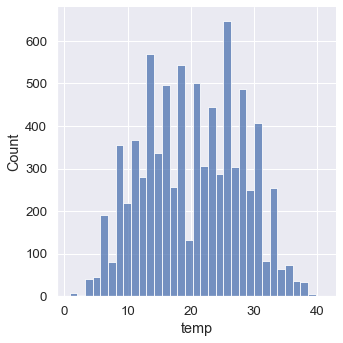

In [28]:
sns.displot(df['temp'], kde=False)

<AxesSubplot:xlabel='temp', ylabel='Density'>

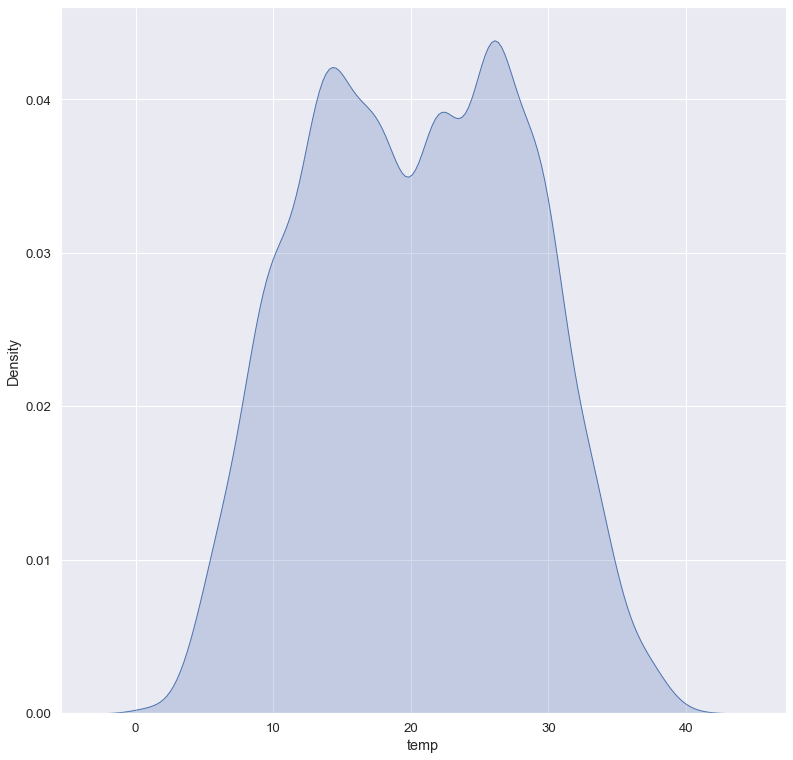

In [29]:
sns.kdeplot(df['temp'], shade=True)

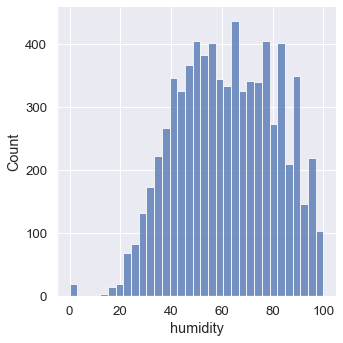

In [30]:
sns.displot(df['humidity'], kde=False)

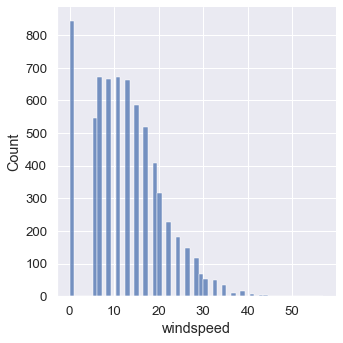

In [31]:
sns.displot(df['windspeed'], kde=False)

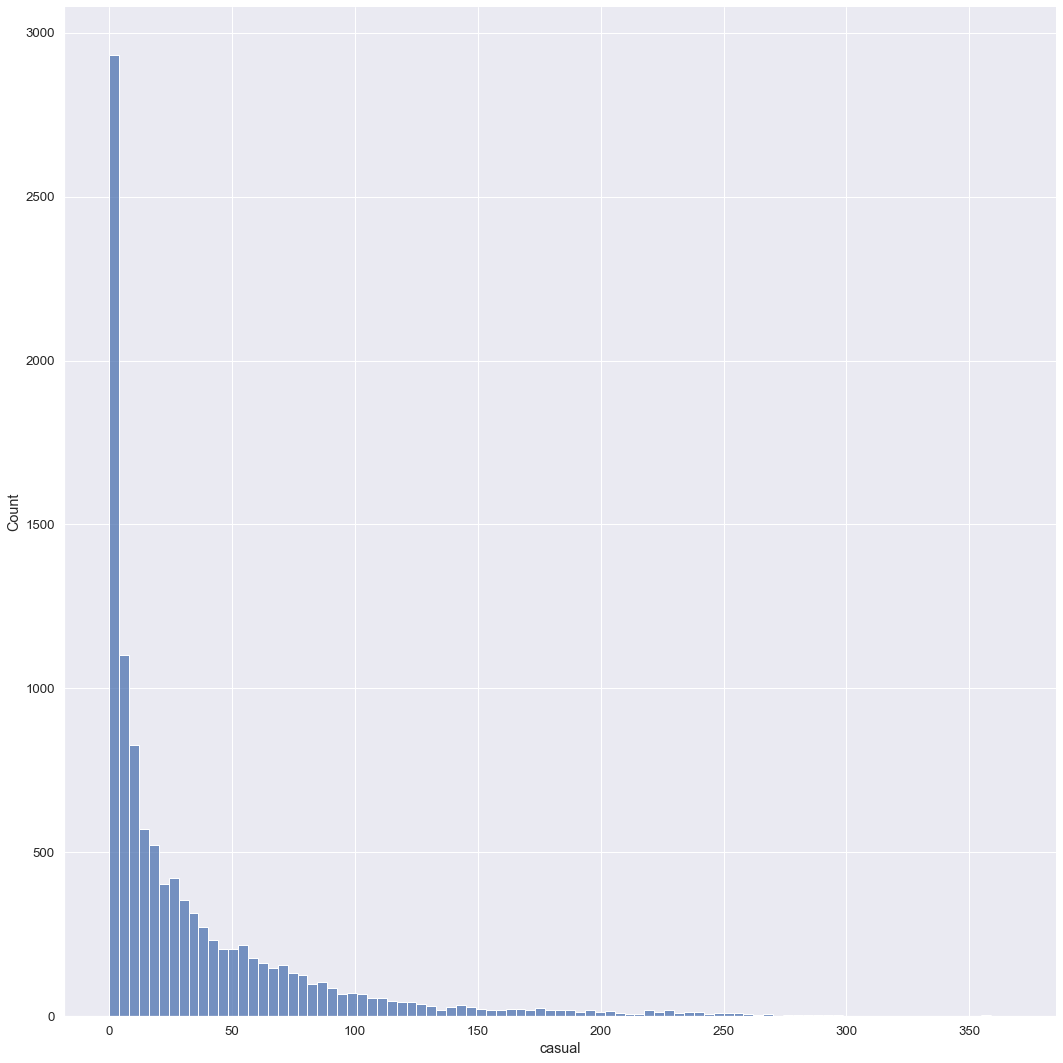

In [32]:
sns.displot(df['casual'], kde=False, height=15)

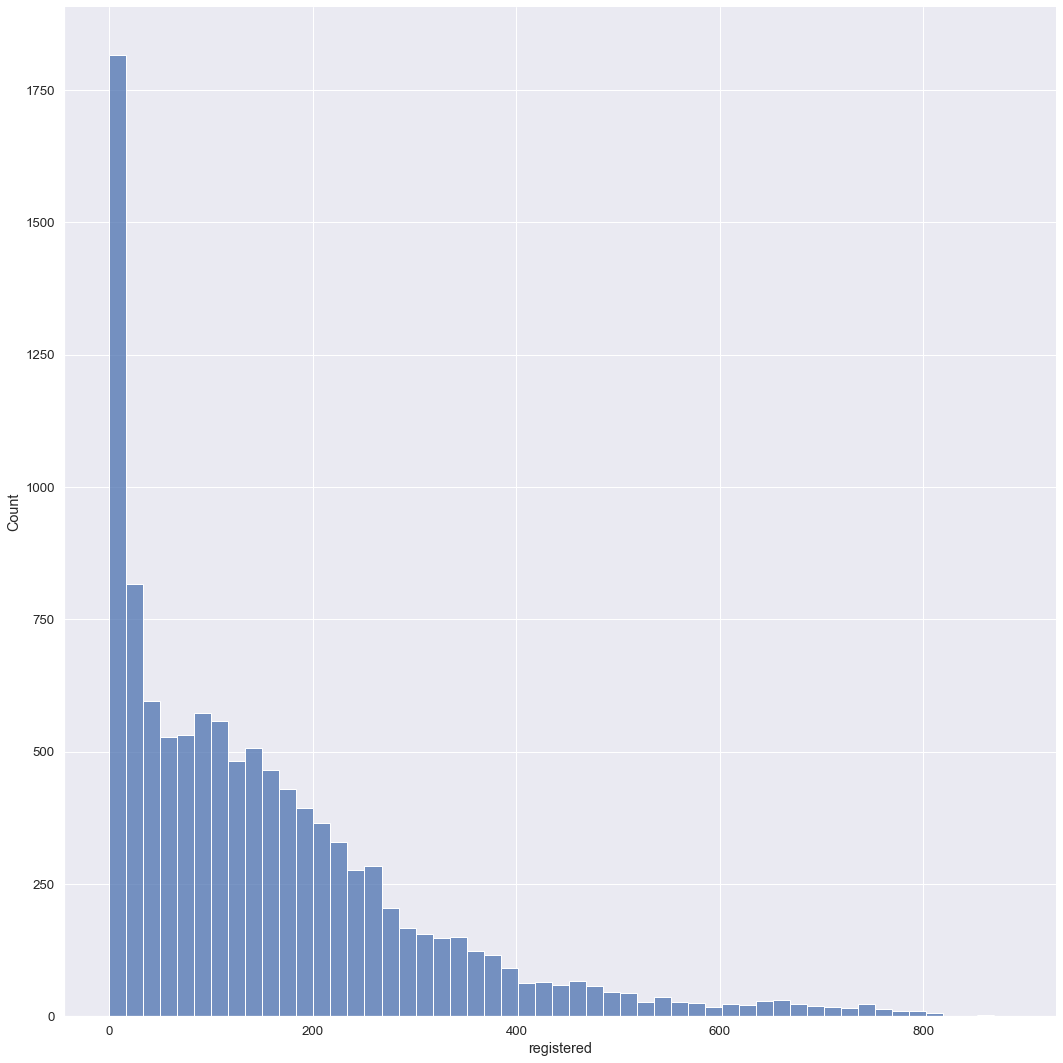

In [33]:
sns.displot(df['registered'], kde=False, height=15)

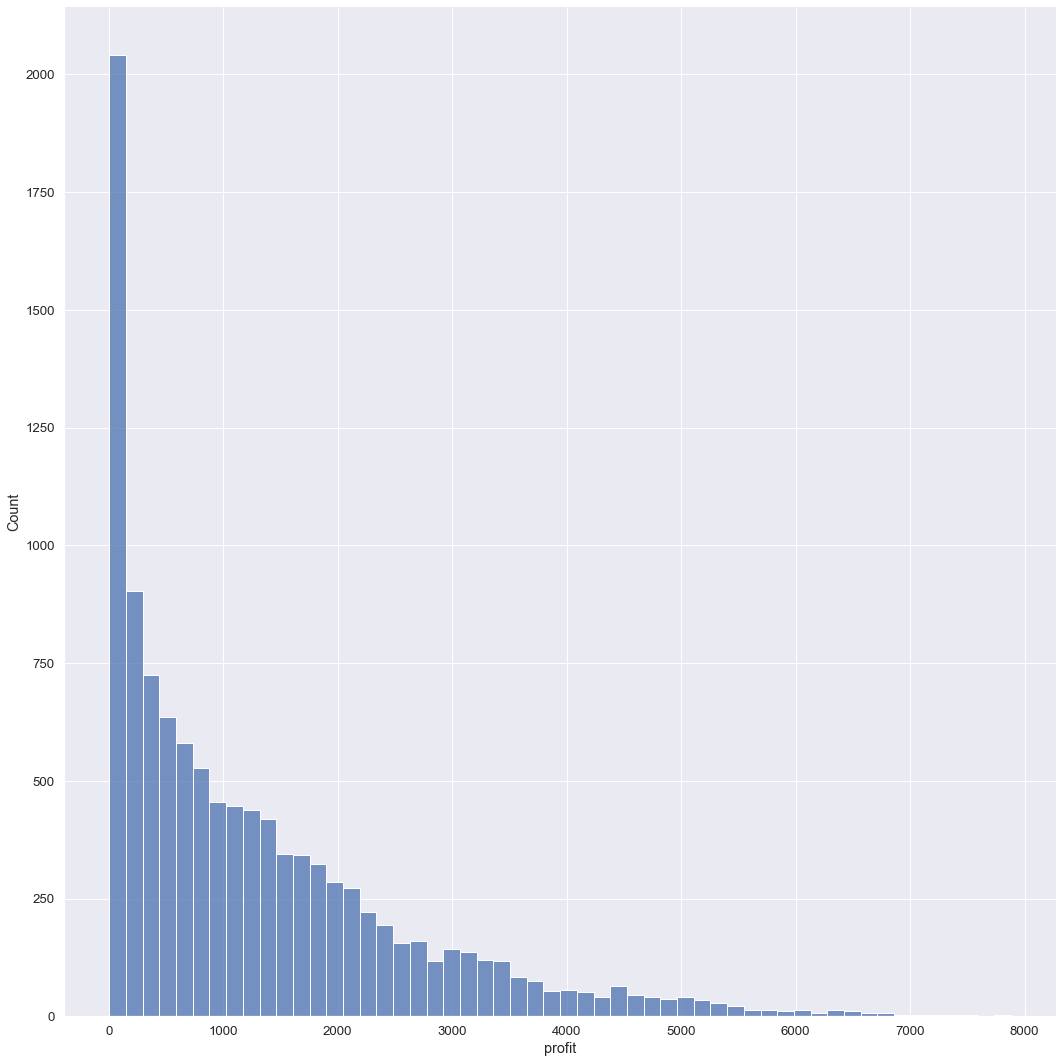

In [34]:
sns.displot(df['profit'], kde=False, height=15)

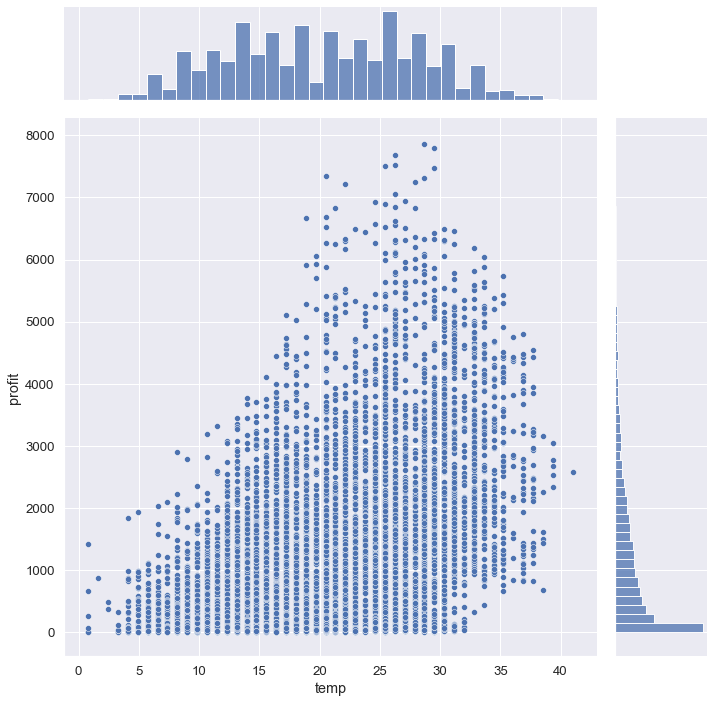

In [35]:
sns.jointplot(x='temp', y='profit', data=df, kind='scatter', height=10)

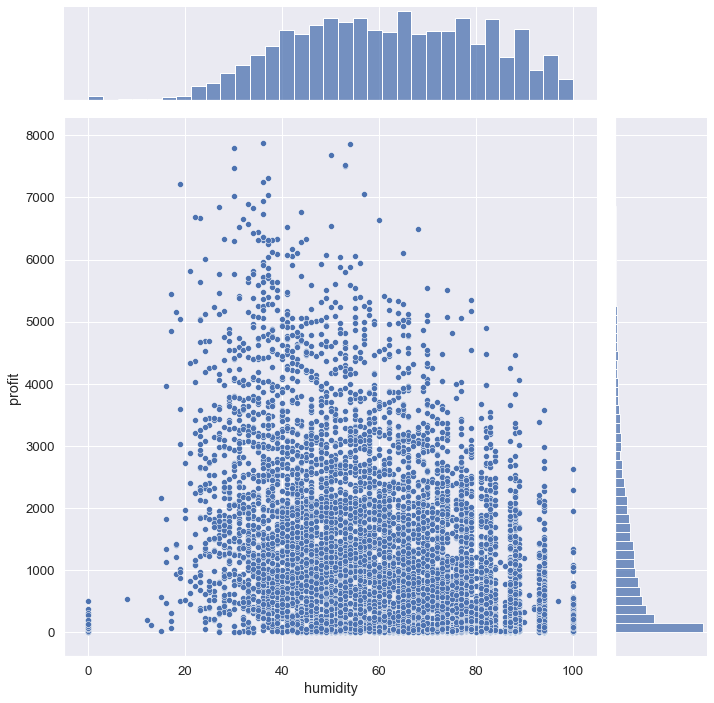

In [36]:
sns.jointplot(x='humidity', y='profit', data=df, kind='scatter', height=10)

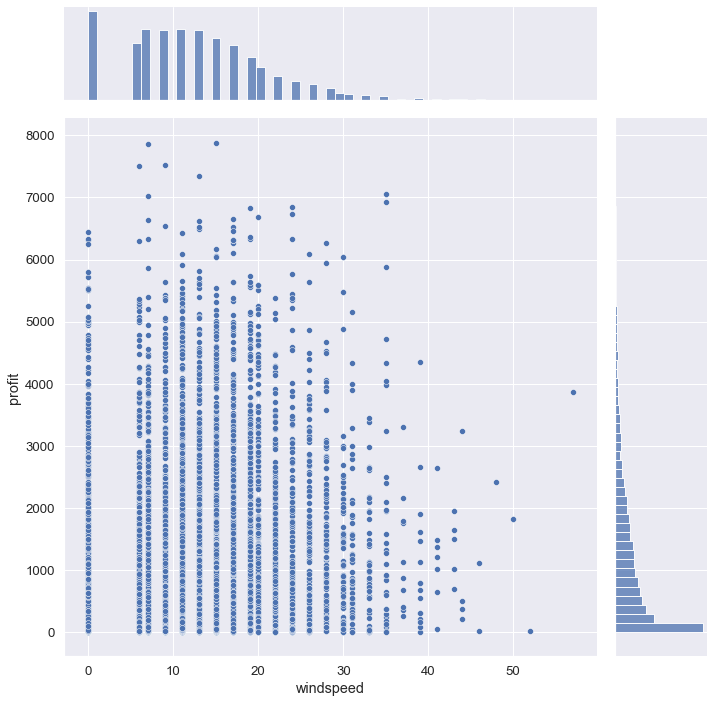

In [37]:
sns.jointplot(x='windspeed', y='profit', data=df, kind='scatter', height=10)

In [38]:
df

datetime  season  holiday  workingday weather   temp  \
0     2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1     2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2     2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3     2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4     2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                   ...     ...      ...         ...     ...    ...   
10881 2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882 2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883 2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884 2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885 2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit week_day_name  hour  is_rush_hour  
0       107.328767      Saturday     0             0  
1       275.028767      Saturday     1             0  
2       201.928767      Saturday     2             0  
3        94.428767      Saturday     3             0  
4         4.128767      Saturday     4             0  
...            ...           ...   ...           ...  
10881  1534.928767     Wednesday    19             0  
10882  1165.128767     Wednesday    20             0  
10883   773.828767     Wednesday    21             0  
10884   709.328767     Wednesday    22             0  
10885   429.828767     Wednesday    23             0  

[10886 rows x 15 columns]

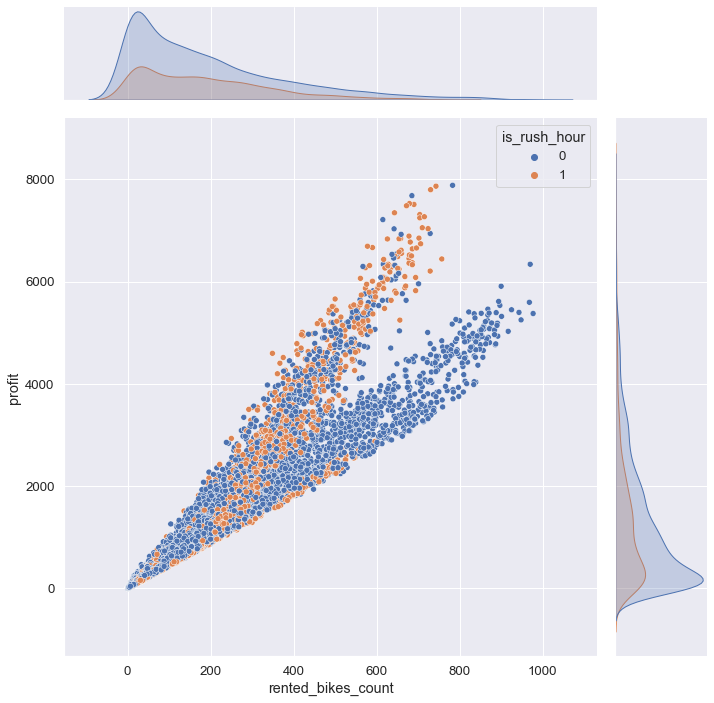

In [39]:
sns.jointplot(x='rented_bikes_count', y='profit', data=df, kind='scatter', height=10, hue='is_rush_hour')

In [40]:
import pandas_profiling as pp

pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='weather', ylabel='count'>

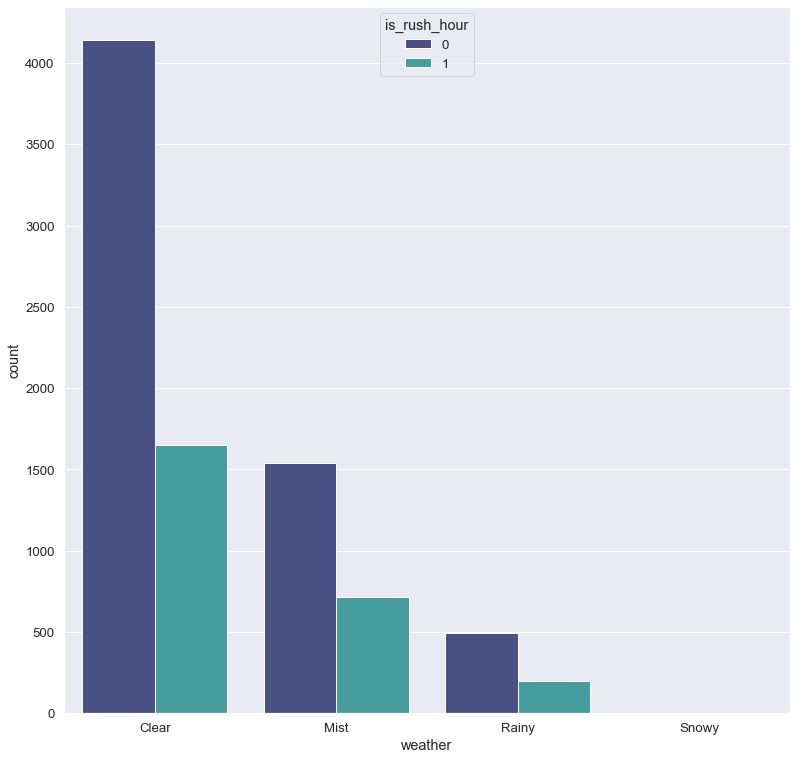

In [41]:
sns.countplot(x='weather', data=df, palette='mako', hue='is_rush_hour')

<AxesSubplot:xlabel='hour', ylabel='profit'>

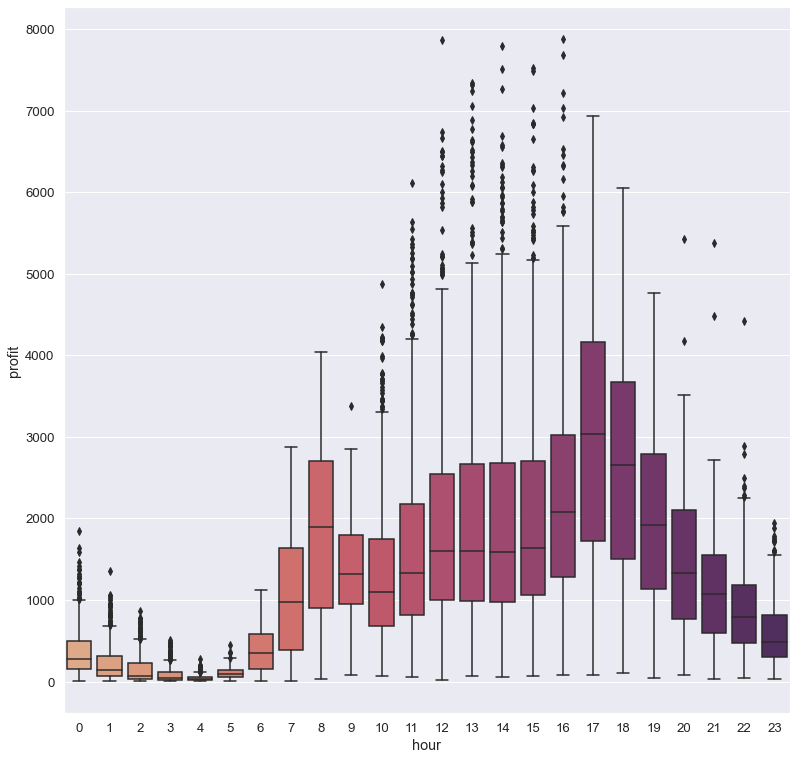

In [42]:
sns.boxplot(x='hour', y='profit', data=df, palette='flare')

<AxesSubplot:>

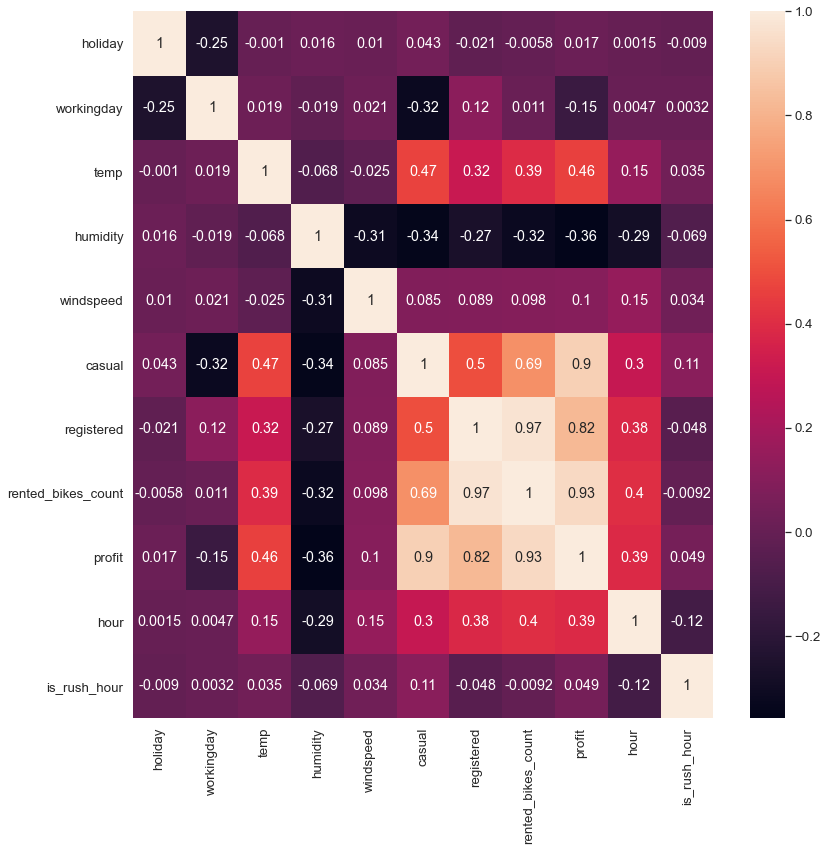

In [43]:
sns.heatmap(df.corr(), annot=True)

In [44]:
df

datetime  season  holiday  workingday weather   temp  \
0     2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1     2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2     2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3     2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4     2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                   ...     ...      ...         ...     ...    ...   
10881 2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882 2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883 2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884 2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885 2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit week_day_name  hour  is_rush_hour  
0       107.328767      Saturday     0             0  
1       275.028767      Saturday     1             0  
2       201.928767      Saturday     2             0  
3        94.428767      Saturday     3             0  
4         4.128767      Saturday     4             0  
...            ...           ...   ...           ...  
10881  1534.928767     Wednesday    19             0  
10882  1165.128767     Wednesday    20             0  
10883   773.828767     Wednesday    21             0  
10884   709.328767     Wednesday    22             0  
10885   429.828767     Wednesday    23             0  

[10886 rows x 15 columns]

In [45]:
df['month'] = df['datetime'].dt.month
df

datetime  season  holiday  workingday weather   temp  \
0     2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1     2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2     2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3     2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4     2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                   ...     ...      ...         ...     ...    ...   
10881 2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882 2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883 2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884 2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885 2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit week_day_name  hour  is_rush_hour  month  
0       107.328767      Saturday     0             0      1  
1       275.028767      Saturday     1             0      1  
2       201.928767      Saturday     2             0      1  
3        94.428767      Saturday     3             0      1  
4         4.128767      Saturday     4             0      1  
...            ...           ...   ...           ...    ...  
10881  1534.928767     Wednesday    19             0     12  
10882  1165.128767     Wednesday    20             0     12  
10883   773.828767     Wednesday    21             0     12  
10884   709.328767     Wednesday    22             0     12  
10885   429.828767     Wednesday    23             0     12  

[10886 rows x 16 columns]

In [46]:
list(range(12, 18))

[12, 13, 14, 15, 16, 17]

In [47]:
def extract_period_of_day(hour):
    if hour in range(12):
        return 'Morning'
    elif hour in range(12, 18):
        return 'Afternoon'
    elif hour in range(18, 22):
        return 'Evening'
    else:
        return 'Night'

df['peroid_of_day'] = df['hour'].apply(extract_period_of_day)

In [48]:
df

datetime  season  holiday  workingday weather   temp  \
0     2011-01-01 00:00:00  Spring      0.0         0.0   Clear   9.84   
1     2011-01-01 01:00:00  Spring      0.0         0.0     NaN   9.02   
2     2011-01-01 02:00:00  Spring      0.0         0.0   Clear   9.02   
3     2011-01-01 03:00:00  Spring      0.0         0.0   Clear   9.84   
4     2011-01-01 04:00:00     NaN      0.0         0.0   Clear    NaN   
...                   ...     ...      ...         ...     ...    ...   
10881 2012-12-19 19:00:00  Winter      0.0         1.0   Clear  15.58   
10882 2012-12-19 20:00:00  Winter      0.0         1.0     NaN  14.76   
10883 2012-12-19 21:00:00     NaN      0.0         1.0   Clear  13.94   
10884 2012-12-19 22:00:00  Winter      NaN         1.0   Clear  13.94   
10885 2012-12-19 23:00:00  Winter      0.0         1.0   Clear  13.12   

       humidity  windspeed  casual  registered  rented_bikes_count  \
0          81.0        NaN       3          13                  16   
1          80.0     0.0000       8          32                  40   
2           NaN     0.0000       5          27                  32   
3          75.0     0.0000       3          10                  13   
4          75.0        NaN       0           1                   1   
...         ...        ...     ...         ...                 ...   
10881      50.0    26.0027       7         329                 336   
10882       NaN        NaN      10         231                 241   
10883      61.0    15.0013       4         164                 168   
10884       NaN     6.0032      12         117                 129   
10885      66.0     8.9981       4          84                  88   

            profit week_day_name  hour  is_rush_hour  month peroid_of_day  
0       107.328767      Saturday     0             0      1       Morning  
1       275.028767      Saturday     1             0      1       Morning  
2       201.928767      Saturday     2             0      1       Morning  
3        94.428767      Saturday     3             0      1       Morning  
4         4.128767      Saturday     4             0      1       Morning  
...            ...           ...   ...           ...    ...           ...  
10881  1534.928767     Wednesday    19             0     12       Evening  
10882  1165.128767     Wednesday    20             0     12       Evening  
10883   773.828767     Wednesday    21             0     12       Evening  
10884   709.328767     Wednesday    22             0     12         Night  
10885   429.828767     Wednesday    23             0     12         Night  

[10886 rows x 17 columns]

In [49]:
df.drop(['datetime', 'casual', 'registered', 'profit', 'holiday', 'workingday'], axis=1, inplace=True)

In [50]:
df

season weather   temp  humidity  windspeed  rented_bikes_count  \
0      Spring   Clear   9.84      81.0        NaN                  16   
1      Spring     NaN   9.02      80.0     0.0000                  40   
2      Spring   Clear   9.02       NaN     0.0000                  32   
3      Spring   Clear   9.84      75.0     0.0000                  13   
4         NaN   Clear    NaN      75.0        NaN                   1   
...       ...     ...    ...       ...        ...                 ...   
10881  Winter   Clear  15.58      50.0    26.0027                 336   
10882  Winter     NaN  14.76       NaN        NaN                 241   
10883     NaN   Clear  13.94      61.0    15.0013                 168   
10884  Winter   Clear  13.94       NaN     6.0032                 129   
10885  Winter   Clear  13.12      66.0     8.9981                  88   

      week_day_name  hour  is_rush_hour  month peroid_of_day  
0          Saturday     0             0      1       Morning  
1          Saturday     1             0      1       Morning  
2          Saturday     2             0      1       Morning  
3          Saturday     3             0      1       Morning  
4          Saturday     4             0      1       Morning  
...             ...   ...           ...    ...           ...  
10881     Wednesday    19             0     12       Evening  
10882     Wednesday    20             0     12       Evening  
10883     Wednesday    21             0     12       Evening  
10884     Wednesday    22             0     12         Night  
10885     Wednesday    23             0     12         Night  

[10886 rows x 11 columns]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              10672 non-null  object 
 1   weather             8746 non-null   object 
 2   temp                8104 non-null   float64
 3   humidity            7462 non-null   float64
 4   windspeed           6820 non-null   float64
 5   rented_bikes_count  10886 non-null  int64  
 6   week_day_name       10886 non-null  object 
 7   hour                10886 non-null  int64  
 8   is_rush_hour        10886 non-null  int64  
 9   month               10886 non-null  int64  
 10  peroid_of_day       10886 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 935.6+ KB


In [52]:
df.columns

Index(['season', 'weather', 'temp', 'humidity', 'windspeed',
       'rented_bikes_count', 'week_day_name', 'hour', 'is_rush_hour', 'month',
       'peroid_of_day'],
      dtype='object')

In [53]:
numerical_columns = ['temp', 'humidity', 'windspeed', 'rented_bikes_count']
categorical_features = ['season', 'weather', 'week_day_name', 'hour','is_rush_hour', 'month', 'peroid_of_day']

In [54]:
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              10672 non-null  object 
 1   weather             8746 non-null   object 
 2   temp                8104 non-null   float64
 3   humidity            7462 non-null   float64
 4   windspeed           6820 non-null   float64
 5   rented_bikes_count  10886 non-null  int64  
 6   week_day_name       10886 non-null  object 
 7   hour                10886 non-null  int64  
 8   is_rush_hour        10886 non-null  int64  
 9   month               10886 non-null  int64  
 10  peroid_of_day       10886 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 935.6+ KB


In [56]:
df[numerical_columns].describe()

temp     humidity    windspeed  rented_bikes_count
count  8104.000000  7462.000000  6820.000000        10886.000000
mean     20.317665    61.790673    12.708806          191.574132
std       7.818568    19.262084     8.131154          181.144454
min       0.820000     0.000000     0.000000            1.000000
25%      13.940000    47.000000     7.001500           42.000000
50%      20.500000    62.000000    12.998000          145.000000
75%      26.240000    77.000000    16.997900          284.000000
max      41.000000   100.000000    56.996900          977.000000

In [57]:
for col in categorical_features:
    print(f'----------- {col} -----------')
    print(df[col].unique())
    print('\n')

----------- season -----------
['Spring' nan 'Summer' 'Fall' 'Winter']


----------- weather -----------
['Clear' nan 'Mist' 'Rainy' 'Snowy']


----------- week_day_name -----------
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


----------- hour -----------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


----------- is_rush_hour -----------
[0 1]


----------- month -----------
[ 1  2  3  4  5  6  7  8  9 10 11 12]


----------- peroid_of_day -----------
['Morning' 'Afternoon' 'Evening' 'Night']




In [58]:
df.shape

(10886, 11)

In [59]:
numerical_columns

['temp', 'humidity', 'windspeed', 'rented_bikes_count']

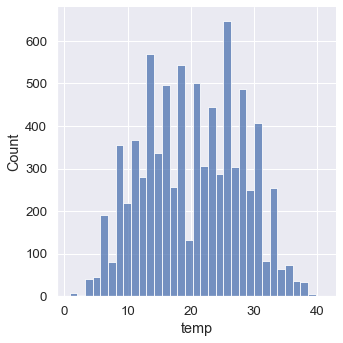

In [60]:
sns.displot(df['temp'], kde=False)

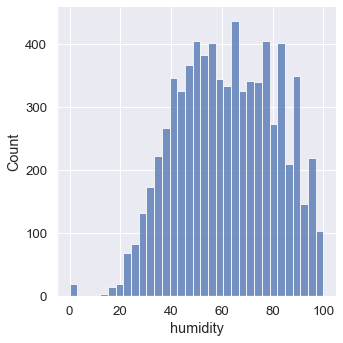

In [61]:
sns.displot(df['humidity'], kde=False)

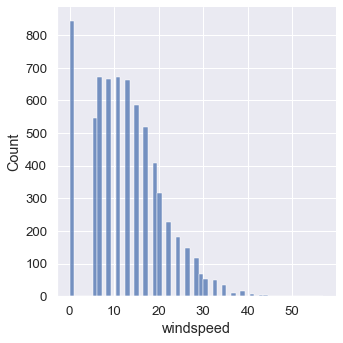

In [62]:
sns.displot(df['windspeed'], kde=False)

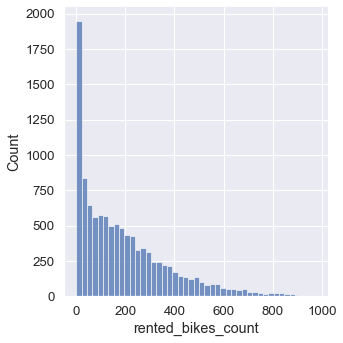

In [63]:
sns.displot(df['rented_bikes_count'], kde=False)

In [64]:
from datasist.structdata import detect_outliers

In [65]:
# for col in numerical_columns:
#     outliers_indices = detect_outliers(df, 0, [col])
#     df[col].iloc[outliers_indices] = np.nan

In [66]:
df.isna().sum()

season                 214
weather               2140
temp                  2782
humidity              3424
windspeed             4066
rented_bikes_count       0
week_day_name            0
hour                     0
is_rush_hour             0
month                    0
peroid_of_day            0
dtype: int64

In [67]:
df.corr()

temp  humidity  windspeed  rented_bikes_count  \
temp                1.000000 -0.068240  -0.025425            0.391867   
humidity           -0.068240  1.000000  -0.312628           -0.317282   
windspeed          -0.025425 -0.312628   1.000000            0.097747   
rented_bikes_count  0.391867 -0.317282   0.097747            1.000000   
hour                0.147415 -0.287224   0.145908            0.400601   
is_rush_hour        0.035240 -0.068672   0.033805           -0.009213   
month               0.269902  0.201084  -0.172232            0.166862   

                        hour  is_rush_hour     month  
temp                0.147415      0.035240  0.269902  
humidity           -0.287224     -0.068672  0.201084  
windspeed           0.145908      0.033805 -0.172232  
rented_bikes_count  0.400601     -0.009213  0.166862  
hour                1.000000     -0.115979 -0.006818  
is_rush_hour       -0.115979      1.000000 -0.002256  
month              -0.006818     -0.002256  1.000000

In [68]:
df.drop(['windspeed'], axis=1, inplace=True)

In [69]:
df

season weather   temp  humidity  rented_bikes_count week_day_name  \
0      Spring   Clear   9.84      81.0                  16      Saturday   
1      Spring     NaN   9.02      80.0                  40      Saturday   
2      Spring   Clear   9.02       NaN                  32      Saturday   
3      Spring   Clear   9.84      75.0                  13      Saturday   
4         NaN   Clear    NaN      75.0                   1      Saturday   
...       ...     ...    ...       ...                 ...           ...   
10881  Winter   Clear  15.58      50.0                 336     Wednesday   
10882  Winter     NaN  14.76       NaN                 241     Wednesday   
10883     NaN   Clear  13.94      61.0                 168     Wednesday   
10884  Winter   Clear  13.94       NaN                 129     Wednesday   
10885  Winter   Clear  13.12      66.0                  88     Wednesday   

       hour  is_rush_hour  month peroid_of_day  
0         0             0      1       Morning  
1         1             0      1       Morning  
2         2             0      1       Morning  
3         3             0      1       Morning  
4         4             0      1       Morning  
...     ...           ...    ...           ...  
10881    19             0     12       Evening  
10882    20             0     12       Evening  
10883    21             0     12       Evening  
10884    22             0     12         Night  
10885    23             0     12         Night  

[10886 rows x 10 columns]

In [70]:
df.isna().sum()

season                 214
weather               2140
temp                  2782
humidity              3424
rented_bikes_count       0
week_day_name            0
hour                     0
is_rush_hour             0
month                    0
peroid_of_day            0
dtype: int64

In [71]:
from sklearn.impute import SimpleImputer, KNNImputer

In [72]:
imputer = KNNImputer()

In [73]:
df['temp'] = imputer.fit_transform(df[['temp']])
df['humidity'] = imputer.fit_transform(df[['humidity']])

In [74]:
df.isna().sum()

season                 214
weather               2140
temp                     0
humidity                 0
rented_bikes_count       0
week_day_name            0
hour                     0
is_rush_hour             0
month                    0
peroid_of_day            0
dtype: int64

In [75]:
imputer = SimpleImputer(strategy='most_frequent')

In [76]:
for col in ['season', 'weather']:
    df[col] = imputer.fit_transform(df[[col]])

In [77]:
df.isna().sum()

season                0
weather               0
temp                  0
humidity              0
rented_bikes_count    0
week_day_name         0
hour                  0
is_rush_hour          0
month                 0
peroid_of_day         0
dtype: int64

In [78]:
categorical_features

['season',
 'weather',
 'week_day_name',
 'hour',
 'is_rush_hour',
 'month',
 'peroid_of_day']

In [79]:
df

season weather       temp   humidity  rented_bikes_count week_day_name  \
0      Spring   Clear   9.840000  81.000000                  16      Saturday   
1      Spring   Clear   9.020000  80.000000                  40      Saturday   
2      Spring   Clear   9.020000  61.790673                  32      Saturday   
3      Spring   Clear   9.840000  75.000000                  13      Saturday   
4      Winter   Clear  20.317665  75.000000                   1      Saturday   
...       ...     ...        ...        ...                 ...           ...   
10881  Winter   Clear  15.580000  50.000000                 336     Wednesday   
10882  Winter   Clear  14.760000  61.790673                 241     Wednesday   
10883  Winter   Clear  13.940000  61.000000                 168     Wednesday   
10884  Winter   Clear  13.940000  61.790673                 129     Wednesday   
10885  Winter   Clear  13.120000  66.000000                  88     Wednesday   

       hour  is_rush_hour  month peroid_of_day  
0         0             0      1       Morning  
1         1             0      1       Morning  
2         2             0      1       Morning  
3         3             0      1       Morning  
4         4             0      1       Morning  
...     ...           ...    ...           ...  
10881    19             0     12       Evening  
10882    20             0     12       Evening  
10883    21             0     12       Evening  
10884    22             0     12         Night  
10885    23             0     12         Night  

[10886 rows x 10 columns]

In [80]:
df = pd.get_dummies(df, columns=['season', 'weather', 'week_day_name', 'peroid_of_day'], drop_first=True)
df

temp   humidity  rented_bikes_count  hour  is_rush_hour  month  \
0       9.840000  81.000000                  16     0             0      1   
1       9.020000  80.000000                  40     1             0      1   
2       9.020000  61.790673                  32     2             0      1   
3       9.840000  75.000000                  13     3             0      1   
4      20.317665  75.000000                   1     4             0      1   
...          ...        ...                 ...   ...           ...    ...   
10881  15.580000  50.000000                 336    19             0     12   
10882  14.760000  61.790673                 241    20             0     12   
10883  13.940000  61.000000                 168    21             0     12   
10884  13.940000  61.790673                 129    22             0     12   
10885  13.120000  66.000000                  88    23             0     12   

       season_Spring  season_Summer  season_Winter  weather_Mist  ...  \
0                  1              0              0             0  ...   
1                  1              0              0             0  ...   
2                  1              0              0             0  ...   
3                  1              0              0             0  ...   
4                  0              0              1             0  ...   
...              ...            ...            ...           ...  ...   
10881              0              0              1             0  ...   
10882              0              0              1             0  ...   
10883              0              0              1             0  ...   
10884              0              0              1             0  ...   
10885              0              0              1             0  ...   

       weather_Snowy  week_day_name_Monday  week_day_name_Saturday  \
0                  0                     0                       1   
1                  0                     0                       1   
2                  0                     0                       1   
3                  0                     0                       1   
4                  0                     0                       1   
...              ...                   ...                     ...   
10881              0                     0                       0   
10882              0                     0                       0   
10883              0                     0                       0   
10884              0                     0                       0   
10885              0                     0                       0   

       week_day_name_Sunday  week_day_name_Thursday  week_day_name_Tuesday  \
0                         0                       0                      0   
1                         0                       0                      0   
2                         0                       0                      0   
3                         0                       0                      0   
4                         0                       0                      0   
...                     ...                     ...                    ...   
10881                     0                       0                      0   
10882                     0                       0                      0   
10883                     0                       0                      0   
10884                     0                       0                      0   
10885                     0                       0                      0   

       week_day_name_Wednesday  peroid_of_day_Evening  peroid_of_day_Morning  \
0                            0                      0                      1   
1                            0                      0                      1   
2                            0                      0                      1   
3                            0                      0                      1   
4                   

In [81]:
x = df.drop('rented_bikes_count', axis=1)
y = df['rented_bikes_count']

In [82]:
x

temp   humidity  hour  is_rush_hour  month  season_Spring  \
0       9.840000  81.000000     0             0      1              1   
1       9.020000  80.000000     1             0      1              1   
2       9.020000  61.790673     2             0      1              1   
3       9.840000  75.000000     3             0      1              1   
4      20.317665  75.000000     4             0      1              0   
...          ...        ...   ...           ...    ...            ...   
10881  15.580000  50.000000    19             0     12              0   
10882  14.760000  61.790673    20             0     12              0   
10883  13.940000  61.000000    21             0     12              0   
10884  13.940000  61.790673    22             0     12              0   
10885  13.120000  66.000000    23             0     12              0   

       season_Summer  season_Winter  weather_Mist  weather_Rainy  \
0                  0              0             0              0   
1                  0              0             0              0   
2                  0              0             0              0   
3                  0              0             0              0   
4                  0              1             0              0   
...              ...            ...           ...            ...   
10881              0              1             0              0   
10882              0              1             0              0   
10883              0              1             0              0   
10884              0              1             0              0   
10885              0              1             0              0   

       weather_Snowy  week_day_name_Monday  week_day_name_Saturday  \
0                  0                     0                       1   
1                  0                     0                       1   
2                  0                     0                       1   
3                  0                     0                       1   
4                  0                     0                       1   
...              ...                   ...                     ...   
10881              0                     0                       0   
10882              0                     0                       0   
10883              0                     0                       0   
10884              0                     0                       0   
10885              0                     0                       0   

       week_day_name_Sunday  week_day_name_Thursday  week_day_name_Tuesday  \
0                         0                       0                      0   
1                         0                       0                      0   
2                         0                       0                      0   
3                         0                       0                      0   
4                         0                       0                      0   
...                     ...                     ...                    ...   
10881                     0                       0                      0   
10882                     0                       0                      0   
10883                     0                       0                      0   
10884                     0                       0                      0   
10885                     0                       0                      0   

       week_day_name_Wednesday  peroid_of_day_Evening  peroid_of_day_Morning  \
0                            0                      0                      1   
1                            0                      0                      1   
2                            0                      0                      1   
3                            0                      0                      1   
4                            0                      0                      1   
...                        ...                    ...       

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler= StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [88]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, model.predict(x_test)))}')
    print('-'*30)

Using model: LR
Training Score: 0.4403961563582768
Test Score: 0.4363781153913918
RMSE: 137.3127666256457
------------------------------
Using model: KNNR
Training Score: 0.7069935886339336
Test Score: 0.5474150339229912
RMSE: 123.04587399599393
------------------------------
Using model: SVR
Training Score: 0.319051924531052
Test Score: 0.2986729826510681
RMSE: 153.17125772848146
------------------------------
Using model: DT
Training Score: 0.9972700943671381
Test Score: 0.6548413512995459
RMSE: 107.45493695343062
------------------------------
Using model: RF
Training Score: 0.9714129194958815
Test Score: 0.8004131062681453
RMSE: 81.71146616541505
------------------------------
Using model: XGBR
Training Score: 0.9184203381853111
Test Score: 0.8205001673505146
RMSE: 77.49059894293842
------------------------------


In [91]:
model = XGBRegressor()

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
y_pred = model.predict(x_test)
y_pred

array([212.74385 , 233.25974 , 302.28424 , ...,   9.992653,  21.672058,
        69.52234 ], dtype=float32)

In [93]:
y_test

4573     162
8139     292
10111    402
3883     299
9278      92
        ... 
9305       6
5935     216
2502      14
6382       2
8          8
Name: rented_bikes_count, Length: 2178, dtype: int64

In [94]:
import joblib

In [95]:
joblib.dump(model, 'model.h5')

['model.h5']

In [96]:
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [97]:
x.columns

Index(['temp', 'humidity', 'hour', 'is_rush_hour', 'month', 'season_Spring',
       'season_Summer', 'season_Winter', 'weather_Mist', 'weather_Rainy',
       'weather_Snowy', 'week_day_name_Monday', 'week_day_name_Saturday',
       'week_day_name_Sunday', 'week_day_name_Thursday',
       'week_day_name_Tuesday', 'week_day_name_Wednesday',
       'peroid_of_day_Evening', 'peroid_of_day_Morning',
       'peroid_of_day_Night'],
      dtype='object')

In [98]:
custom_data = []
for inp in x.columns:
    print(f'{inp}: ')
    val = float(input())
    custom_data.append(val)

data = []
for v in custom_data:
    data.append(float(v))


model.predict(scaler.transform([data]))